In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:

dataset = pd.read_csv('Data2.csv')
x = dataset.iloc [:, [2,3]].values
y = dataset.iloc [:, -1 ].values

In [49]:
print(x)

[[ 3 85]
 [ 3 75]
 [ 3 50]
 [ 3 80]
 [ 3 60]
 [ 3 62]
 [ 3 55]
 [ 3 90]
 [ 3 59]]


In [50]:
print(y)

[1 1 0 1 0 0 0 1 0]


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [52]:
print (x_train)

[[ 3 60]
 [ 3 59]
 [ 3 55]
 [ 3 80]
 [ 3 85]
 [ 3 62]]


In [53]:
print (x_test)

[[ 3 90]
 [ 3 50]
 [ 3 75]]


In [54]:
print (y_train)

[0 0 0 1 1 0]


In [55]:
print (y_test)

[1 0 1]


In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [57]:
print (x_train)

[[ 0.         -0.60131783]
 [ 0.         -0.68931556]
 [ 0.         -1.04130649]
 [ 0.          1.1586368 ]
 [ 0.          1.59862546]
 [ 0.         -0.42532237]]


In [58]:
print (x_test)

[[ 0.          2.03861412]
 [ 0.         -1.48129515]
 [ 0.          0.71864814]]


In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
y_pred = classifier.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[1 0]
 [2 0]]


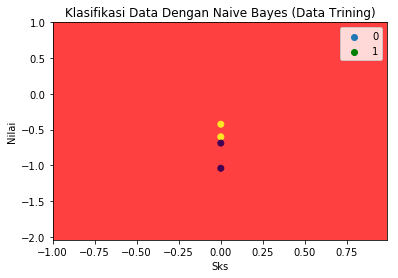

In [62]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Dengan Naive Bayes (Data Trining)')
plt.xlabel('Sks')
plt.ylabel('Nilai')
plt.legend()
plt.show()

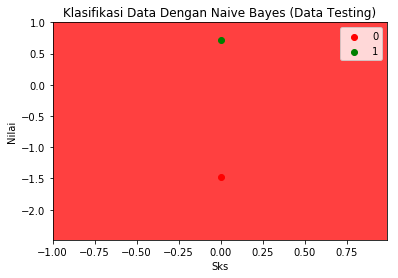

In [63]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j,1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Dengan Naive Bayes (Data Testing)')
plt.xlabel('Sks')
plt.ylabel('Nilai')
plt.legend()
plt.show()